In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import wrds
import datetime
import timeit
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import multiprocessing as mp
import shelve
from dateutil import relativedelta

In [130]:
msf = pd.read_csv('../data/qje-hassan/msf.csv',index_col=0)
print(msf.shape)
msf.head()

(737548, 8)


,permno,gvkey,iid,date,prc,vol,ret,retx
0,10001.0,12994,1,2000-01-31,8.12500,403.0,-0.044118,-0.044118
1,10001.0,12994,1,2000-02-29,8.25000,222.0,0.015385,0.015385
2,10001.0,12994,1,2000-03-31,-8.00000,723.0,-0.015758,-0.030303
3,10001.0,12994,1,2000-04-28,-8.09375,263.0,0.011719,0.011719
4,10001.0,12994,1,2000-05-31,-7.90625,221.0,-0.023166,-0.023166


In [131]:
def gvkey_numToSting(n):
    s = str(n)
    while len(s)<6:
        s='0'+s
    return s

pool = mp.Pool(mp.cpu_count())
msf['gvkey'] = pool.map(gvkey_numToSting, msf['gvkey'])
pool.close()
msf

,permno,gvkey,iid,date,prc,vol,ret,retx
0,10001.0,012994,1,2000-01-31,8.125000,403.0,-0.044118,-0.044118
1,10001.0,012994,1,2000-02-29,8.250000,222.0,0.015385,0.015385
2,10001.0,012994,1,2000-03-31,-8.000000,723.0,-0.015758,-0.030303
3,10001.0,012994,1,2000-04-28,-8.093750,263.0,0.011719,0.011719
4,10001.0,012994,1,2000-05-31,-7.906250,221.0,-0.023166,-0.023166
...,...,...,...,...,...,...,...,...
737543,93436.0,184996,1,2018-08-31,301.660004,2773316.0,0.011806,0.011806
737544,93436.0,184996,1,2018-09-28,264.769989,1960767.0,-0.122290,-0.122290
737545,93436.0,184996,1,2018-10-31,337.320007,2864231.0,0.274011,0.274011
737546,93436.0,184996,1,2018-11-30,350.480011,1331285.0,0.039013,0.039013


In [133]:
msf['date'] = pd.to_datetime(msf['date'])
def last_day_of_month(any_day):
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)  # this will never fail
    return next_month - datetime.timedelta(days=next_month.day)

pool = mp.Pool(mp.cpu_count())
msf['mdate'] = pool.map(last_day_of_month, msf['date'])
pool.close()

In [144]:
dfm = pd.read_csv('../data/qje-hassan/all.csv',index_col=0)
print(dfm.shape)
dfm.head()

(262488, 25)


,gvkey,date_x,PRisk,NPRisk,Risk,PSentiment,NPSentiment,Sentiment,PRiskT_economic,PRiskT_environment,...,PRiskT_technology,company_name,mdate,permno,iid,date_y,prc,vol,ret,retx
0,1004,2002-03-31,356.40557,2902.98360,167.504190,1045.462100,5510.6821,465.28941,8922.822,6276.046,...,9705.0650,AAR Corp.,2002-03-31,54594.0,1.0,2002-03-28,10.77,36150.0,0.455405,0.455405
1,1004,2002-06-30,0.00000,0.00000,0.000000,1572.150500,-5571.7572,537.10938,0.000,0.000,...,0.0000,AAR Corp.,2002-06-30,54594.0,1.0,2002-06-28,10.20,19325.0,-0.108392,-0.108392
2,1004,2002-09-30,0.00000,0.00000,0.000000,48.652736,-17572.1840,314.07035,0.000,0.000,...,0.0000,AAR Corp.,2002-09-30,54594.0,1.0,2002-09-30,4.75,28183.0,-0.233871,-0.233871
3,1004,2003-09-30,0.00000,0.00000,0.000000,2542.936300,80476.0080,1294.96400,0.000,0.000,...,0.0000,AAR Corp.,2003-09-30,54594.0,1.0,2003-09-30,8.02,12949.0,0.001248,0.001248
4,1004,2003-12-31,0.00000,289.75972,96.153846,1989.060200,80336.5650,1730.76920,2195.165,2080.516,...,370.0162,AAR Corp.,2003-12-31,54594.0,1.0,2003-12-31,14.95,50917.0,0.429254,0.429254


In [145]:
def gvkey_numToSting(n):
    s = str(n)
    while len(s)<6:
        s='0'+s
    return s

pool = mp.Pool(mp.cpu_count())
dfm['gvkey'] = pool.map(gvkey_numToSting, dfm['gvkey'])
pool.close()
msf

,permno,gvkey,iid,date,prc,vol,ret,retx,mdate
0,10001.0,012994,1,2000-01-31,8.125000,403.0,-0.044118,-0.044118,2000-01-31
1,10001.0,012994,1,2000-02-29,8.250000,222.0,0.015385,0.015385,2000-02-29
2,10001.0,012994,1,2000-03-31,-8.000000,723.0,-0.015758,-0.030303,2000-03-31
3,10001.0,012994,1,2000-04-28,-8.093750,263.0,0.011719,0.011719,2000-04-30
4,10001.0,012994,1,2000-05-31,-7.906250,221.0,-0.023166,-0.023166,2000-05-31
...,...,...,...,...,...,...,...,...,...
737543,93436.0,184996,1,2018-08-31,301.660004,2773316.0,0.011806,0.011806,2018-08-31
737544,93436.0,184996,1,2018-09-28,264.769989,1960767.0,-0.122290,-0.122290,2018-09-30
737545,93436.0,184996,1,2018-10-31,337.320007,2864231.0,0.274011,0.274011,2018-10-31
737546,93436.0,184996,1,2018-11-30,350.480011,1331285.0,0.039013,0.039013,2018-11-30


In [146]:
nonmiss = pd.read_csv('../data/qje-hassan/nonmiss.csv',index_col=0)
print(nonmiss.shape)
nonmiss.head()

(155300, 25)


,gvkey,date_x,PRisk,NPRisk,Risk,PSentiment,NPSentiment,Sentiment,PRiskT_economic,PRiskT_environment,...,PRiskT_technology,company_name,mdate,permno,iid,date_y,prc,vol,ret,retx
0,1004,2002-03-31,356.40557,2902.98360,167.504190,1045.462100,5510.6821,465.28941,8922.822,6276.046,...,9705.0650,AAR Corp.,2002-03-31,54594.0,1,2002-03-28,10.77,36150.0,0.455405,0.455405
1,1004,2002-06-30,0.00000,0.00000,0.000000,1572.150500,-5571.7572,537.10938,0.000,0.000,...,0.0000,AAR Corp.,2002-06-30,54594.0,1,2002-06-28,10.20,19325.0,-0.108392,-0.108392
2,1004,2002-09-30,0.00000,0.00000,0.000000,48.652736,-17572.1840,314.07035,0.000,0.000,...,0.0000,AAR Corp.,2002-09-30,54594.0,1,2002-09-30,4.75,28183.0,-0.233871,-0.233871
3,1004,2003-09-30,0.00000,0.00000,0.000000,2542.936300,80476.0080,1294.96400,0.000,0.000,...,0.0000,AAR Corp.,2003-09-30,54594.0,1,2003-09-30,8.02,12949.0,0.001248,0.001248
4,1004,2003-12-31,0.00000,289.75972,96.153846,1989.060200,80336.5650,1730.76920,2195.165,2080.516,...,370.0162,AAR Corp.,2003-12-31,54594.0,1,2003-12-31,14.95,50917.0,0.429254,0.429254


In [166]:
def gvkey_numToSting(n):
    s = str(n)
    while len(s)<6:
        s='0'+s
    return s

pool = mp.Pool(mp.cpu_count())
nonmiss['gvkey'] = pool.map(gvkey_numToSting, nonmiss['gvkey'])
pool.close()
msf

,permno,gvkey,iid,date,prc,vol,ret,retx,mdate
0,10001.0,012994,1,2000-01-31,8.125000,403.0,-0.044118,-0.044118,2000-01-31
1,10001.0,012994,1,2000-02-29,8.250000,222.0,0.015385,0.015385,2000-02-29
2,10001.0,012994,1,2000-03-31,-8.000000,723.0,-0.015758,-0.030303,2000-03-31
3,10001.0,012994,1,2000-04-28,-8.093750,263.0,0.011719,0.011719,2000-04-30
4,10001.0,012994,1,2000-05-31,-7.906250,221.0,-0.023166,-0.023166,2000-05-31
...,...,...,...,...,...,...,...,...,...
737543,93436.0,184996,1,2018-08-31,301.660004,2773316.0,0.011806,0.011806,2018-08-31
737544,93436.0,184996,1,2018-09-28,264.769989,1960767.0,-0.122290,-0.122290,2018-09-30
737545,93436.0,184996,1,2018-10-31,337.320007,2864231.0,0.274011,0.274011,2018-10-31
737546,93436.0,184996,1,2018-11-30,350.480011,1331285.0,0.039013,0.039013,2018-11-30


# number of obs per quarter

In [167]:
grp_all = dfm.groupby('mdate')
num_series_all = pd.Series(grp_all.count()['gvkey'])
num_series_all.index = pd.to_datetime(num_series_all.index)

In [168]:
grp_nonmiss = nonmiss.groupby('mdate')
num_series_ret = pd.Series(grp_nonmiss.count()['gvkey'])
num_series_ret.index = pd.to_datetime(num_series_ret.index)

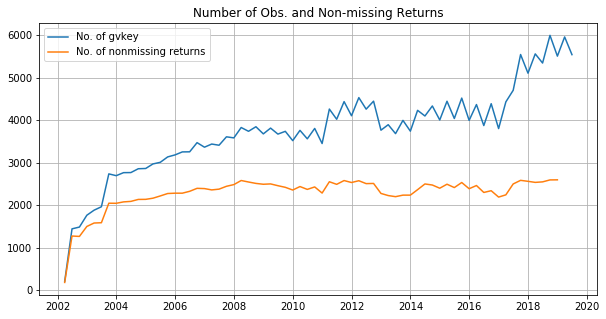

In [211]:
plt.figure(figsize=(10,5))
plt.plot(num_series_all, label='No. of gvkey')
plt.plot(num_series_ret, label='No. of nonmissing returns')
plt.legend(loc='upper left')
plt.grid()
plt.title('Number of Obs. and Non-missing Returns')
plt.show()

# long-short portfolio / quarterly rebalancing

In [170]:
nonmiss.columns

Index(['gvkey', 'date_x', 'PRisk', 'NPRisk', 'Risk', 'PSentiment',
       'NPSentiment', 'Sentiment', 'PRiskT_economic', 'PRiskT_environment',
       'PRiskT_trade', 'PRiskT_institutions', 'PRiskT_health',
       'PRiskT_security', 'PRiskT_tax', 'PRiskT_technology', 'company_name',
       'mdate', 'permno', 'iid', 'date_y', 'prc', 'vol', 'ret', 'retx'],
      dtype='object')

# sorting by quarter

In [171]:
df = nonmiss[['gvkey', 'date_x', 'PRisk', 'NPRisk', 'Risk', 'PSentiment',
       'NPSentiment', 'Sentiment', 'PRiskT_economic', 'PRiskT_environment',
       'PRiskT_trade', 'PRiskT_institutions', 'PRiskT_health',
       'PRiskT_security', 'PRiskT_tax', 'PRiskT_technology', 'mdate']]

df['date'] = pd.to_datetime(df['mdate'])
df = df.drop('mdate',1)
df

/Users/phd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gvkey,date_x,PRisk,NPRisk,Risk,PSentiment,NPSentiment,Sentiment,PRiskT_economic,PRiskT_environment,PRiskT_trade,PRiskT_institutions,PRiskT_health,PRiskT_security,PRiskT_tax,PRiskT_technology,date
0,001004,2002-03-31,356.405570,2902.983600,167.504190,1045.462100,5510.6821,465.28941,8922.82200,6276.04600,8864.50600,3530.3400,6696.8500,4879.49900,4890.5980,9705.0650,2002-03-31
1,001004,2002-06-30,0.000000,0.000000,0.000000,1572.150500,-5571.7572,537.10938,0.00000,0.00000,0.00000,0.0000,0.0000,0.00000,0.0000,0.0000,2002-06-30
2,001004,2002-09-30,0.000000,0.000000,0.000000,48.652736,-17572.1840,314.07035,0.00000,0.00000,0.00000,0.0000,0.0000,0.00000,0.0000,0.0000,2002-09-30
3,001004,2003-09-30,0.000000,0.000000,0.000000,2542.936300,80476.0080,1294.96400,0.00000,0.00000,0.00000,0.0000,0.0000,0.00000,0.0000,0.0000,2003-09-30
4,001004,2003-12-31,0.000000,289.759720,96.153846,1989.060200,80336.5650,1730.76920,2195.16500,2080.51600,954.36580,4123.5170,1904.4850,2192.08800,3219.5920,370.0162,2003-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260010,315318,2018-03-31,0.000000,204.913170,0.000000,2043.117900,30558.1590,1057.38630,25.12534,61.66926,0.00000,0.0000,0.0000,68.52051,0.0000,67.7619,2018-03-31
260011,315318,2018-06-30,18.841970,663.435610,14.675668,2062.391200,19011.9040,733.78339,640.39680,241.24380,54.34891,314.1775,589.6602,552.94760,362.3321,464.8069,2018-06-30
260012,315318,2018-09-30,118.355130,3074.380100,61.462815,1653.795600,28309.6700,1290.71910,3713.41100,6265.77900,85.34416,2628.4410,2283.8280,1582.97600,6947.2290,1506.6970,2018-09-30
260013,315318,2018-12-31,8.043522,658.230420,61.833359,1822.701800,-20908.3200,757.45865,1677.99700,848.52910,3861.23300,553.1604,1203.0890,1079.54500,967.5178,1168.7400,2018-12-31


In [195]:
var = 'Sentiment'
bp=df.groupby(['date'])[var].describe(percentiles=[0.2, 0.4,0.6,0.8]).reset_index()
bp

,date,count,mean,std,min,20%,40%,50%,60%,80%,max
0,2002-03-31,183.0,608.857585,435.701664,-657.40326,278.090076,476.718134,572.753310,663.125256,1007.951340,1901.6122
1,2002-06-30,1275.0,643.789377,482.617168,-1173.02050,283.649224,526.538140,634.879500,746.886664,1010.065760,2374.1007
2,2002-09-30,1266.0,607.547148,470.549492,-1253.43410,221.308880,475.624260,590.724360,710.115200,980.772970,2456.5862
3,2002-12-31,1500.0,572.358889,494.056704,-1477.12260,170.512250,442.870328,558.774785,667.051868,987.355026,2821.8013
4,2003-03-31,1581.0,592.737018,478.234816,-1643.74370,226.878420,460.895870,566.764910,676.645480,955.485610,3391.5725
...,...,...,...,...,...,...,...,...,...,...,...
63,2017-12-31,2562.0,878.734492,528.743682,-1549.11010,459.181346,744.598082,867.061450,1002.990940,1295.383080,3089.3821
64,2018-03-31,2537.0,983.125020,499.191429,-1899.23500,574.157258,855.182178,972.719140,1096.941920,1381.345240,2943.0859
65,2018-06-30,2549.0,973.627705,517.836593,-2590.01900,578.169230,848.490048,961.136650,1089.557420,1389.141980,3502.7134
66,2018-09-30,2595.0,986.423972,524.170197,-3634.02480,572.436672,858.762604,983.675180,1111.246000,1410.963460,2781.1366


In [196]:
bp=bp[['date','20%','40%','60%','80%']].rename(columns={'20%':'20', '40%':'40', '60%':'60', '80%':'80'})
bp

,date,20,40,60,80
0,2002-03-31,278.090076,476.718134,663.125256,1007.951340
1,2002-06-30,283.649224,526.538140,746.886664,1010.065760
2,2002-09-30,221.308880,475.624260,710.115200,980.772970
3,2002-12-31,170.512250,442.870328,667.051868,987.355026
4,2003-03-31,226.878420,460.895870,676.645480,955.485610
...,...,...,...,...,...
63,2017-12-31,459.181346,744.598082,1002.990940,1295.383080
64,2018-03-31,574.157258,855.182178,1096.941920,1381.345240
65,2018-06-30,578.169230,848.490048,1089.557420,1389.141980
66,2018-09-30,572.436672,858.762604,1111.246000,1410.963460


In [197]:
df_bp = pd.merge(df[['gvkey','date',var]], bp, how='inner', on=['date'])
df_bp.columns = ['gvkey','date','var','20','40','60','80']
df_bp

,gvkey,date,var,20,40,60,80
0,001004,2002-03-31,465.28941,278.090076,476.718134,663.125256,1007.95134
1,001177,2002-03-31,857.91323,278.090076,476.718134,663.125256,1007.95134
2,001468,2002-03-31,490.44356,278.090076,476.718134,663.125256,1007.95134
3,001554,2002-03-31,-167.59191,278.090076,476.718134,663.125256,1007.95134
4,001633,2002-03-31,317.25888,278.090076,476.718134,663.125256,1007.95134
...,...,...,...,...,...,...,...
155295,264708,2013-06-30,2058.17110,461.741420,735.294120,967.261900,1257.25340
155296,266214,2013-06-30,1092.76350,461.741420,735.294120,967.261900,1257.25340
155297,271794,2013-06-30,675.41977,461.741420,735.294120,967.261900,1257.25340
155298,274165,2013-06-30,-638.65546,461.741420,735.294120,967.261900,1257.25340


In [198]:
def var_bucket(row):
    if row['var']==np.nan:
        value=''
    elif row['var']<=row['20']:
        value='1'
    elif row['var']<=row['40']:
        value='2'
    elif row['var']<=row['60']:
        value='3'
    elif row['var']<=row['80']:
        value='4'
    else:
        value='5'
    return value

In [199]:
df_bp['label'] = df_bp.apply(var_bucket, axis=1)

In [200]:
df0 = df_bp[['gvkey','date','var','label']]
df0

,gvkey,date,var,label
0,001004,2002-03-31,465.28941,2
1,001177,2002-03-31,857.91323,4
2,001468,2002-03-31,490.44356,3
3,001554,2002-03-31,-167.59191,1
4,001633,2002-03-31,317.25888,2
...,...,...,...,...
155295,264708,2013-06-30,2058.17110,5
155296,266214,2013-06-30,1092.76350,4
155297,271794,2013-06-30,675.41977,2
155298,274165,2013-06-30,-638.65546,1


# merge portfolio returns

In [201]:
df1 = df0.copy()

def last_day_of_next_1_month(any_day):
    d1 = any_day+relativedelta.relativedelta(months=1)
    next_month = d1.replace(day=28) + datetime.timedelta(days=4)  # this will never fail
    return next_month - datetime.timedelta(days=next_month.day)

pool = mp.Pool(mp.cpu_count())
df1['mdate'] = pool.map(last_day_of_next_1_month, df1['date'])
pool.close()
df1

,gvkey,date,var,label,mdate
0,001004,2002-03-31,465.28941,2,2002-04-30
1,001177,2002-03-31,857.91323,4,2002-04-30
2,001468,2002-03-31,490.44356,3,2002-04-30
3,001554,2002-03-31,-167.59191,1,2002-04-30
4,001633,2002-03-31,317.25888,2,2002-04-30
...,...,...,...,...,...
155295,264708,2013-06-30,2058.17110,5,2013-07-31
155296,266214,2013-06-30,1092.76350,4,2013-07-31
155297,271794,2013-06-30,675.41977,2,2013-07-31
155298,274165,2013-06-30,-638.65546,1,2013-07-31


In [202]:
df2 = df0.copy()

def last_day_of_next_2_month(any_day):
    d1 = any_day+relativedelta.relativedelta(months=2)
    next_month = d1.replace(day=28) + datetime.timedelta(days=4)  # this will never fail
    return next_month - datetime.timedelta(days=next_month.day)

pool = mp.Pool(mp.cpu_count())
df2['mdate'] = pool.map(last_day_of_next_2_month, df2['date'])
pool.close()
df2

,gvkey,date,var,label,mdate
0,001004,2002-03-31,465.28941,2,2002-05-31
1,001177,2002-03-31,857.91323,4,2002-05-31
2,001468,2002-03-31,490.44356,3,2002-05-31
3,001554,2002-03-31,-167.59191,1,2002-05-31
4,001633,2002-03-31,317.25888,2,2002-05-31
...,...,...,...,...,...
155295,264708,2013-06-30,2058.17110,5,2013-08-31
155296,266214,2013-06-30,1092.76350,4,2013-08-31
155297,271794,2013-06-30,675.41977,2,2013-08-31
155298,274165,2013-06-30,-638.65546,1,2013-08-31


In [203]:
df3 = df0.copy()

def last_day_of_next_3_month(any_day):
    d1 = any_day+relativedelta.relativedelta(months=3)
    next_month = d1.replace(day=28) + datetime.timedelta(days=4)  # this will never fail
    return next_month - datetime.timedelta(days=next_month.day)

pool = mp.Pool(mp.cpu_count())
df3['mdate'] = pool.map(last_day_of_next_3_month, df3['date'])
pool.close()
df3

,gvkey,date,var,label,mdate
0,001004,2002-03-31,465.28941,2,2002-06-30
1,001177,2002-03-31,857.91323,4,2002-06-30
2,001468,2002-03-31,490.44356,3,2002-06-30
3,001554,2002-03-31,-167.59191,1,2002-06-30
4,001633,2002-03-31,317.25888,2,2002-06-30
...,...,...,...,...,...
155295,264708,2013-06-30,2058.17110,5,2013-09-30
155296,266214,2013-06-30,1092.76350,4,2013-09-30
155297,271794,2013-06-30,675.41977,2,2013-09-30
155298,274165,2013-06-30,-638.65546,1,2013-09-30


In [204]:
df_concat = pd.concat([df1,df2,df3])
df_concat = df_concat.sort_values(['gvkey','date','mdate'])
df_concat['mdate'] = pd.to_datetime(df_concat['mdate'])
df_concat.head(50)

,gvkey,date,var,label,mdate
0,001004,2002-03-31,465.28941,2,2002-04-30
0,001004,2002-03-31,465.28941,2,2002-05-31
0,001004,2002-03-31,465.28941,2,2002-06-30
183,001004,2002-06-30,537.10938,3,2002-07-31
183,001004,2002-06-30,537.10938,3,2002-08-31
183,001004,2002-06-30,537.10938,3,2002-09-30
1458,001004,2002-09-30,314.07035,2,2002-10-31
1458,001004,2002-09-30,314.07035,2,2002-11-30
1458,001004,2002-09-30,314.07035,2,2002-12-31
2724,001004,2003-09-30,1294.96400,5,2003-10-31


In [205]:
df_label_ret = pd.merge(df_concat,msf[['gvkey','mdate','ret']],on=['gvkey','mdate'])

# port vw ret

In [206]:
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return np.nan

In [207]:
def avg(group, avg_name):
    d = group[avg_name]
    try:
        return d.mean()
    except ZeroDivisionError:
        return np.nan

In [208]:
ewret=df_label_ret.groupby(['mdate','label']).apply(avg, 'ret').to_frame().reset_index().rename(columns={0: 'ewret'})
ewret

,mdate,label,ewret
0,2002-04-30,1,-0.001946
1,2002-04-30,2,-0.062249
2,2002-04-30,3,-0.032039
3,2002-04-30,4,-0.045425
4,2002-04-30,5,-0.004459
...,...,...,...
1000,2018-12-31,1,-0.138050
1001,2018-12-31,2,-0.136767
1002,2018-12-31,3,-0.129935
1003,2018-12-31,4,-0.119744


In [209]:
pvtb=ewret.pivot('mdate','label','ewret')

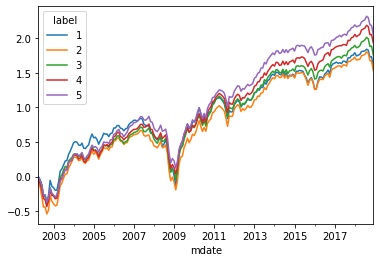

In [210]:
pvtb.cumsum().plot()